<Figure size 1000x600 with 0 Axes>

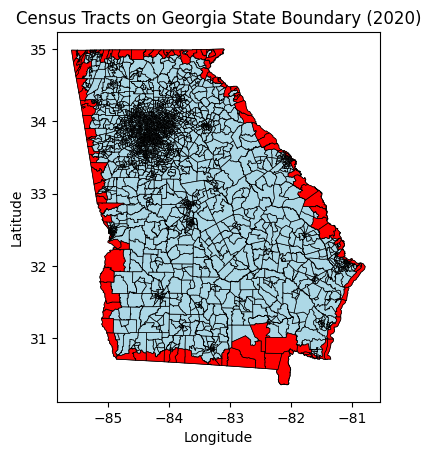


Number of Tracts on State Boundary (Improved):
135

Boundary Tracts by County:
   COUNTYFP20  num_boundary_tracts
0         027                    1
1         033                    2
2         039                    7
3         045                    2
4         047                    6
5         049                    3
6         051                    6
7         053                    2
8         055                    2
9         061                    1
10        065                    1
11        073                    5
12        083                    4
13        087                    2
14        099                    3
15        101                    2
16        103                    4
17        105                    2
18        111                    3
19        115                    2
20        119                    1
21        127                    1
22        131                    1
23        137                    1
24        143                    3
25        

/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98337/2466035478.py:387: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['130019501001000' '130019501001001' '130019501001007' ...
 '133219506002055' '133219506002056' '133219506002058']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_active.loc[:, BLOCK_ID_COLUMN] = df_active[BLOCK_ID_COLUMN].astype(str)
/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98337/2466035478.py:391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[:, 'census_tract'] = df_active[BLOCK_ID_COLUMN].str.zfill(15).str[:11]
/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_

Successfully assigned 2785 tracts to districts.
  census_tract  DISTRICT
0  13099090500         2
1  13099090400         2
2  13099090200         2
3  13067031209        11
4  13067031207        11

Aggregating tract data to the Congressional District level...
District-level aggregates:
   DISTRICT  total_reg_tract  estimated_dem_votes_tract  \
0        13         514980.0              245157.144385   
1        11         580660.0              106962.868090   
2         5         472608.0              192494.595682   
3         4         579986.0              269293.825824   
4         7         431264.0              125663.833651   

   estimated_rep_votes_tract  CVAP_TOT22  
0               32491.360074    553940.0  
1              176935.741923    609720.0  
2               44337.583740    486935.0  
3               59761.361900    626324.0  
4               71444.467563    448195.0  

Calculating Polsby-Popper compactness scores...
Original District CRS for calculation: EPSG:4269
R

/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_98337/2466035478.py:550: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gdf_districts_final.fillna(0, inplace=True) # Fill NaN with 0 for calculations


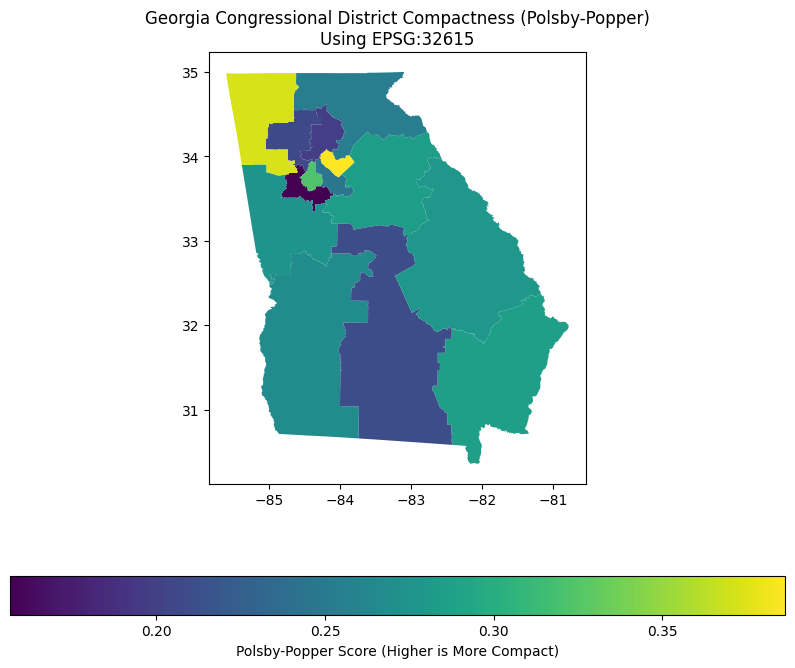


Calculating Efficiency Gap based on estimated 2020 General Election votes...

--- Efficiency Gap Results (Estimated 2020 General Election) ---
    DISTRICT  Dem_Votes  Rep_Votes  Total_Votes  Wasted_Dem_Votes  \
0         13   245157.0    32491.0     277649.0          106332.0   
1         11   106963.0   176936.0     283899.0          106963.0   
2          5   192495.0    44338.0     236832.0           74078.0   
3          4   269294.0    59761.0     329055.0          104766.0   
4          7   125664.0    71444.0     197108.0           27109.0   
5          6    61969.0   106484.0     168453.0           61969.0   
6         10   156618.0   177945.0     334563.0          156618.0   
7          9    61437.0   168538.0     229975.0           61437.0   
8          2   141972.0    76935.0     218908.0           32518.0   
9          3   125281.0   152273.0     277554.0          125281.0   
10         1   116184.0   126202.0     242385.0          116184.0   
11         8   141475.0   15

In [5]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("../StateData/GeorgiaData/GA_2022_prim_l2_vf_2020blocks/GA_2022_prim_l2_vf_2020blocks.csv")


# Dictionary for renaming
rename_dict = {
    'r20220621': 'Runoff_2022',
    'p20220524': 'Primary_2022',
    'g20201103': 'General_2020',
    'r20200331': 'Runoff_2020',
    'pp20200303': 'PresPrimary_2020',
    'p20200303': 'Primary_2020',
    'g20181106': 'General_2018',
    'r20181106': 'RunoffNov_2018',
    'r20180619': 'RunoffJun_2018',
    'p20180522': 'Primary_2018',
    'r20180313': 'RunoffMar_2018',
    's20180213': 'Special_2018',
    'g20161108': 'General_2016',
    'r20160322': 'Runoff_2016',
    'pp20160301': 'PresPrimary_2016',
    'p20160301': 'Primary_2016',
    's20150414': 'SpecialApr_2015',
    's20150113': 'SpecialJan_2015',
    'g20141104': 'General_2014',
    's20140610': 'SpecialJun_2014',
    'p20140520': 'Primary_2014',
    's20140520': 'SpecialMay_2014',
    'g20121106': 'General_2012',
    'pp20120522': 'PresPrimary_2012',
    'p20120522': 'Primary_2012',
    's20111108': 'Special_2011',
    'g20101102': 'General_2010',
    'p20100518': 'Primary_2010'
}

# Rename columns
df.rename(columns=rename_dict, inplace=True)

# # Save the updated dataset
# df.to_csv("voter_data_renamed.csv", index=False)

# Filter out blocks with no registered voters
df_active = df[df['total_reg'] > 0]

# 1. Calculate turnout rates for the 2020 General Election
df_active['turnout_2020'] = df_active['General_2020'] / df_active['total_reg'] * 100

# 2. Calculate party proportions
df_active['pct_rep'] = df_active['party_rep'] / df_active['total_reg'] * 100
df_active['pct_dem'] = df_active['party_dem'] / df_active['total_reg'] * 100
df_active['pct_npp'] = df_active['party_npp'] / df_active['total_reg'] * 100

# 5. Summary statistics
print("Summary of Active Blocks:")
print(f"Total Blocks with Voters: {len(df_active)}")
print(f"Average Turnout in 2020 General: {df_active['turnout_2020'].mean():.2f}%")
print(f"Average % Republican: {df_active['pct_rep'].mean():.2f}%")
print(f"Average % Democratic: {df_active['pct_dem'].mean():.2f}%")
print(f"Average % Non-Partisan: {df_active['pct_npp'].mean():.2f}%")

cvap_file = "../StateData/GeorgiaData/ga_cvap_2022_2020_b/ga_cvap_2022_2020_b.csv"
df_cvap = pd.read_csv(cvap_file)

df_cvap['GEOID20'] = df_cvap['GEOID20'].astype(str)

# Filter out blocks with no CVAP (unpopulated blocks)
df_cvap = df_cvap[df_cvap['CVAP_TOT22'] > 0]

# Fix GEOID20 formatting (pad to 15 digits)
# Ensure GEOID20 is a string and pad with leading zeros if necessary
df_cvap['GEOID20'] = df_cvap['GEOID20'].str.zfill(15)

#Verify that CVAP totals add up correctly
df_cvap['cvap_sum_check'] = (df_cvap['CVAP_NHS22'] + df_cvap['CVAP_HSP22'])
print("\nBlocks where CVAP total doesn't match sum of Non-Hispanic and Hispanic:")
print(df_cvap[df_cvap['CVAP_TOT22'] != df_cvap['cvap_sum_check']][['GEOID20', 'CVAP_TOT22', 'CVAP_NHS22', 'CVAP_HSP22']])

df_cvap['discrepancy'] = df_cvap['CVAP_TOT22'] - (df_cvap['CVAP_NHS22'] + df_cvap['CVAP_HSP22'])
print("\nDiscrepancy statistics:")
print(df_cvap['discrepancy'].describe())
print("\nAbsolute discrepancy statistics:")
print(df_cvap['discrepancy'].abs().describe())

# Extract Census Tract (first 11 digits of GEOID20)
df_cvap['census_tract'] = df_cvap['GEOID20'].str[:11]

# Verify the Census Tract column
print("\nSample census_tract values:", df_cvap['census_tract'].head())
print("Number of unique Census Tracts:", df_cvap['census_tract'].nunique())

# Step 4: Group blocks into Census Tracts
tract_cvap = df_cvap.groupby('census_tract').agg({
    'CVAP_TOT22': 'sum',
    'CVAP_WHT22': 'sum',
    'CVAP_BLK22': 'sum',
    'CVAP_HSP22': 'sum',
    'CVAP_ASN22': 'sum',
    'CVAP_AIA22': 'sum'
}).reset_index()

# Calculate CVAP proportions at the Census Tract level
tract_cvap['pct_white'] = tract_cvap['CVAP_WHT22'] / tract_cvap['CVAP_TOT22'] * 100
tract_cvap['pct_black'] = tract_cvap['CVAP_BLK22'] / tract_cvap['CVAP_TOT22'] * 100
tract_cvap['pct_hispanic'] = tract_cvap['CVAP_HSP22'] / tract_cvap['CVAP_TOT22'] * 100
tract_cvap['pct_asian'] = tract_cvap['CVAP_ASN22'] / tract_cvap['CVAP_TOT22'] * 100
tract_cvap['pct_ami'] = tract_cvap['CVAP_AIA22'] / tract_cvap['CVAP_TOT22'] * 100

# Identify potential minority opportunity districts
# Flag Census Tracts where minority CVAP is >30%
tract_cvap['black_opportunity'] = tract_cvap['pct_black'] > 30
tract_cvap['hispanic_opportunity'] = tract_cvap['pct_hispanic'] > 30
tract_cvap['asian_opportunity'] = tract_cvap['pct_asian'] > 30
tract_cvap['ami_opportunity'] = tract_cvap['pct_ami'] > 30

# Print results
print("\nCensus Tracts with potential Black opportunity districts:")
print(tract_cvap[tract_cvap['black_opportunity']][['census_tract', 'pct_black', 'CVAP_TOT22']])

print("\nCensus Tracts with potential Hispanic opportunity districts:")
print(tract_cvap[tract_cvap['hispanic_opportunity']][['census_tract', 'pct_hispanic', 'CVAP_TOT22']])

print("\nCensus Tracts with potential Asian opportunity districts:")
print(tract_cvap[tract_cvap['asian_opportunity']][['census_tract', 'pct_asian', 'CVAP_TOT22']])

print("\nCensus Tracts with potential American Indian/Alaska Native opportunity districts:")
print(tract_cvap[tract_cvap['ami_opportunity']][['census_tract', 'pct_ami', 'CVAP_TOT22']])

# Step 7: Visualize the distribution of CVAP by race/ethnicity
plt.figure(figsize=(10, 6))
sns.histplot(tract_cvap['pct_white'], bins=30, color='blue', alpha=0.5, label='White', kde=True)
sns.histplot(tract_cvap['pct_black'], bins=30, color='red', alpha=0.5, label='Black', kde=True)
sns.histplot(tract_cvap['pct_hispanic'], bins=30, color='green', alpha=0.5, label='Hispanic', kde=True)
sns.histplot(tract_cvap['pct_asian'], bins=30, color='orange', alpha=0.5, label='Asian', kde=True)
sns.histplot(tract_cvap['pct_ami'], bins=30, color='purple', alpha=0.5, label='Am. Indian/AK Native', kde=True)
plt.xlabel('Percentage of CVAP (%)')
plt.ylabel('Number of Census Tracts')
plt.title('Distribution of CVAP by Race/Ethnicity in Georgia (2018-2022)')
plt.legend()
plt.show()

# Step 8: Summary statistics at the Census Tract level
print("\nSummary statistics for CVAP proportions by Census Tract:")
print(tract_cvap[['pct_white', 'pct_black', 'pct_hispanic', 'pct_asian', 'pct_ami']].describe())

# Step 1: Load the rook and queen adjacency files for Census Tracts
rook_file = "../StateData/GeorgiaData/ga_census_2020_adjacencies/ga_t_2020_rook_adjacency.csv"
queen_file = "../StateData/GeorgiaData/ga_census_2020_adjacencies/ga_t_2020_queen_adjacency.csv"

df_rook = pd.read_csv(rook_file)
df_queen = pd.read_csv(queen_file)

# Step 2: Ensure GEOID20 is a string and padded to 15 digits
df_rook['GEOID20'] = df_rook['GEOID20'].astype(str).str.zfill(11)
df_queen['GEOID20'] = df_queen['GEOID20'].astype(str).str.zfill(11)

# Step 3: Parse ADJ_GEOMS into lists (assuming string format like '[GEOID1, GEOID2]')
df_rook['ADJ_GEOMS'] = df_rook['ADJ_GEOMS'].apply(eval)  # Convert string to list
df_queen['ADJ_GEOMS'] = df_queen['ADJ_GEOMS'].apply(eval)  # Convert string to list

# Step 4: Verify the data
print("Rook Adjacency - First few rows:")
print(df_rook.head())
print("\nQueen Adjacency - First few rows:")
print(df_queen.head())

# Step 5: Calculate number of adjacent tracts (internal connections)
df_rook['num_adjacent'] = df_rook['ADJ_GEOMS'].apply(len)
df_queen['num_adjacent'] = df_queen['ADJ_GEOMS'].apply(len)

print("\nRook Adjacency - Summary of adjacent tracts:")
print(df_rook['num_adjacent'].describe())
print("\nQueen Adjacency - Summary of adjacent tracts:")
print(df_queen['num_adjacent'].describe())

# Step 1: Load the shapefile
shapefile_path = "../StateData/GeorgiaData/ga_cong_adopted_2021/CONGRESS-PROP1-2021-shape.shp"  
gdf_districts = gpd.read_file(shapefile_path)

# Step 2: Inspect the data
print("Dataset Info:")
print(gdf_districts.info())
print("\nFirst few rows:")
print(gdf_districts.head())

# Step 3: Check the coordinate system
print("\nCoordinate Reference System:", gdf_districts.crs)

# Step 4: Plot the districts (basic visualization)
gdf_districts.plot(column='DISTRICT', cmap='tab10', legend=True, figsize=(10, 6))
plt.title("2021 Georgia Congressional Districts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Load the Census Tract shapefile
tract_shapefile = "../StateData/GeorgiaData/ga_t_2020_bound/ga_t_2020_bound.shp"  # Path to the .shp file
gdf_tract_shapes = gpd.read_file(tract_shapefile)

# Inspect the shapefile
print("Census Tract Shapefile Info:")
print(gdf_tract_shapes.info())
print("\nFirst few rows of Census Tract Shapefile:")
print(gdf_tract_shapes.head())
print("\nCoordinate Reference System (CRS):")
print(gdf_tract_shapes.crs)
print("\nNumber of Census Tracts:")
print(len(gdf_tract_shapes))

# Visualize the Census Tract boundaries
gdf_tract_shapes.plot(figsize=(10, 6), color='lightblue', edgecolor='black', linewidth=0.5)
plt.title("2020 Census Tract Boundaries in Georgia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Step 3: Estimate Number of Neighboring Tracts
# Create a spatial index for faster neighbor detection
gdf_tract_shapes_sindex = gdf_tract_shapes.sindex

# Function to count neighbors for each tract
def count_neighbors(row, gdf, sindex):
    geom = row['geometry']
    possible_matches_index = list(sindex.intersection(geom.bounds))
    possible_matches = gdf.iloc[possible_matches_index]
    neighbors = possible_matches[
        (possible_matches.index != row.name) & 
        (possible_matches['geometry'].touches(geom))
    ]
    return len(neighbors)

# Apply the function to count neighbors
gdf_tract_shapes['num_neighbors'] = gdf_tract_shapes.apply(
    lambda row: count_neighbors(row, gdf_tract_shapes, gdf_tract_shapes_sindex), axis=1
)

# Summary statistics for number of neighbors
print("\nSummary Statistics for Number of Neighbors per Tract:")
print(gdf_tract_shapes['num_neighbors'].describe())

# Visualize the distribution of number of neighbors
plt.figure(figsize=(10, 6))
gdf_tract_shapes['num_neighbors'].hist(bins=20, color='purple', alpha=0.7)
plt.title("Distribution of Number of Neighbors per Census Tract in Georgia (2020)")
plt.xlabel("Number of Neighboring Tracts")
plt.ylabel("Number of Tracts")
plt.show()

# Step 4: Spatial Distribution by County
# Count the number of tracts per county
tracts_per_county = gdf_tract_shapes.groupby('COUNTYFP20').size().reset_index(name='num_tracts')

# Summary statistics for tracts per county
print("\nSummary Statistics for Number of Tracts per County:")
print(tracts_per_county['num_tracts'].describe())

# Visualize the number of tracts per county
plt.figure(figsize=(10, 6))
tracts_per_county['num_tracts'].hist(bins=30, color='orange', alpha=0.7)
plt.title("Distribution of Number of Census Tracts per County in Georgia (2020)")
plt.xlabel("Number of Tracts")
plt.ylabel("Number of Counties")
plt.show()

# Map tracts colored by county
gdf_tract_shapes.plot(column='COUNTYFP20', cmap='tab20', legend=False, figsize=(10, 6))
plt.title("Census Tracts Colored by County in Georgia (2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Step 5: Explore Spatial Clustering
# Calculate the centroid of each tract
gdf_tract_shapes['centroid'] = gdf_tract_shapes['geometry'].centroid

# Function to find distance to nearest neighbor
def nearest_neighbor_distance(row, gdf):
    centroid = row['centroid']
    distances = gdf[gdf.index != row.name]['centroid'].distance(centroid)
    return distances.min() if not distances.empty else 0

# Compute nearest neighbor distance for each tract
gdf_tract_shapes['nn_distance'] = gdf_tract_shapes.apply(
    lambda row: nearest_neighbor_distance(row, gdf_tract_shapes), axis=1
)

# Summary statistics for nearest neighbor distances
print("\nSummary Statistics for Nearest Neighbor Distance (degrees):")
print(gdf_tract_shapes['nn_distance'].describe())

# Visualize the distribution of nearest neighbor distances
plt.figure(figsize=(10, 6))
gdf_tract_shapes['nn_distance'].hist(bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Nearest Neighbor Distances for Census Tracts in Georgia (2020)")
plt.xlabel("Distance to Nearest Neighbor (degrees)")
plt.ylabel("Number of Tracts")
plt.show()


gdf_tract_shapes['perimeter_m'] = gdf_tract_shapes['geometry'].length
# Convert area to square meters for ratio calculation
gdf_tract_shapes['area_sqm'] = gdf_tract_shapes['ALAND20'] # ALAND20 is land area

# Compute perimeter-to-area ratio
# This line can create 'inf' if area_sqm is 0
gdf_tract_shapes['pa_ratio'] = gdf_tract_shapes['perimeter_m'] / gdf_tract_shapes['area_sqm']

# CRITICAL FIX: Replace infinite values (np.inf) with Not-a-Number (np.nan)
# Make sure 'np' is defined (from 'import numpy as np')
gdf_tract_shapes['pa_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Summary statistics for perimeter-to-area ratio
# .describe() will now ignore NaN values, giving meaningful statistics for finite ratios.
print("\nSummary Statistics for Perimeter-to-Area Ratio (Tracts, excluding non-finite values):")
print(gdf_tract_shapes['pa_ratio'].describe())

# Visualize the distribution
plt.figure(figsize=(10, 6))
# CRITICAL FIX: Drop NaN values from the Series before plotting the histogram
gdf_tract_shapes['pa_ratio'].dropna().hist(bins=50, color='teal', alpha=0.7)
plt.title("Distribution of Perimeter-to-Area Ratio for Census Tracts in Georgia (2020)")
plt.xlabel("Perimeter-to-Area Ratio")
plt.ylabel("Number of Tracts")
plt.show()

# Step 2.1: Identify Tracts on State Boundary (Improved)

# Dissolve all tracts to create a single state geometry
state_geometry = gdf_tract_shapes.dissolve().geometry.iloc[0]

# Extract the state boundary
state_boundary = state_geometry.boundary

# Identify tracts that intersect or touch the state boundary
gdf_tract_shapes['on_state_boundary'] = gdf_tract_shapes['geometry'].apply(
    lambda geom: geom.intersects(state_boundary) or geom.touches(state_boundary)
)

# Filter boundary tracts
state_boundary_tracts = gdf_tract_shapes[gdf_tract_shapes['on_state_boundary']]

# Visualize state boundary tracts
plt.figure(figsize=(10, 6))
gdf_tract_shapes.plot(color='lightblue', edgecolor='black', linewidth=0.5)
state_boundary_tracts.plot(ax=plt.gca(), color='red', edgecolor='black', linewidth=0.5)
plt.title("Census Tracts on Georgia State Boundary (2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Count boundary tracts
print("\nNumber of Tracts on State Boundary (Improved):")
print(len(state_boundary_tracts))

# Summary of boundary tracts by county
boundary_tracts_by_county = state_boundary_tracts.groupby('COUNTYFP20').size().reset_index(name='num_boundary_tracts')
print("\nBoundary Tracts by County:")
print(boundary_tracts_by_county)

# === Gerrymandering Score Calculation ===

# --- Configuration ---
# Set based on the inspection output
BLOCK_ID_COLUMN = 'geoid20'
# Target CRS for accurate area/length calculations (Choose one appropriate for Georgia)
# Example: NAD83 / Georiga South (ftUS) - EPSG:3082
# Example: UTM Zone 15N (meters) - EPSG:32615
TARGET_CRS = "EPSG:32615" # Using UTM 15N for metric calculations

# --- Step 1: Prepare Block-Level Voter Data for Aggregation ---

# Check if the block ID column exists (should pass now)
if BLOCK_ID_COLUMN not in df_active.columns:
    raise KeyError(f"Column '{BLOCK_ID_COLUMN}' not found in the voter data DataFrame (df_active).")

# Ensure Block ID is string type for consistency
# Use .loc to avoid SettingWithCopyWarning if df_active wasn't copied earlier
df_active.loc[:, BLOCK_ID_COLUMN] = df_active[BLOCK_ID_COLUMN].astype(str)

# Extract Census Tract ID (first 11 digits of the 15-digit Block GEOID20)
# Ensure the block ID is padded correctly if necessary before slicing
df_active.loc[:, 'census_tract'] = df_active[BLOCK_ID_COLUMN].str.zfill(15).str[:11]

# Calculate estimated votes based on 2020 General Election turnout and party registration
# Handle potential division by zero if total_reg is 0 (though df_active should filter this)
# Calculate proportions safely
rep_proportion = (df_active['party_rep'] / df_active['total_reg']).fillna(0)
dem_proportion = (df_active['party_dem'] / df_active['total_reg']).fillna(0)
npp_proportion = (df_active['party_npp'] / df_active['total_reg']).fillna(0)

# Assign estimated votes using .loc
df_active.loc[:, 'Estimated_Dem_Votes_2020'] = df_active['General_2020'] * dem_proportion
df_active.loc[:, 'Estimated_Rep_Votes_2020'] = df_active['General_2020'] * rep_proportion
df_active.loc[:, 'Estimated_NPP_Votes_2020'] = df_active['General_2020'] * npp_proportion


# --- Step 2: Aggregate Block Data to Census Tracts ---

print("\nAggregating block-level voter data to Census Tracts...")
# Ensure required columns exist before aggregation
required_agg_cols = ['census_tract', 'total_reg', 'party_dem', 'party_rep', 'party_npp',
                     'General_2020', 'Estimated_Dem_Votes_2020', 'Estimated_Rep_Votes_2020']
missing_cols = [col for col in required_agg_cols if col not in df_active.columns and col != 'census_tract']
if missing_cols:
    raise KeyError(f"Missing required columns for aggregation in df_active: {missing_cols}")


tract_voter_agg = df_active.groupby('census_tract').agg(
    total_reg_tract=('total_reg', 'sum'),
    party_dem_tract=('party_dem', 'sum'),
    party_rep_tract=('party_rep', 'sum'),
    party_npp_tract=('party_npp', 'sum'),
    voted_general_2020_tract=('General_2020', 'sum'),
    estimated_dem_votes_tract=('Estimated_Dem_Votes_2020', 'sum'),
    estimated_rep_votes_tract=('Estimated_Rep_Votes_2020', 'sum')
).reset_index()

print(f"Aggregated voter data for {len(tract_voter_agg)} tracts.")
print(tract_voter_agg.head())

# --- Step 3: Merge Tract-Level Data (Voter Aggregates, CVAP, Geometry) ---

print("\nMerging aggregated voter data, CVAP data, and tract geometries...")

# Ensure GEOID20/census_tract exists in gdf_tract_shapes for merging
# The previous code likely used GEOID20 from the shapefile. Let's ensure it's treated as the tract ID.
if 'GEOID20' in gdf_tract_shapes.columns:
     gdf_tract_shapes['census_tract'] = gdf_tract_shapes['GEOID20'].astype(str).str.zfill(11)
elif 'GEOID' in gdf_tract_shapes.columns: # Check for alternative name
     gdf_tract_shapes['census_tract'] = gdf_tract_shapes['GEOID'].astype(str).str.zfill(11)
elif 'census_tract' not in gdf_tract_shapes.columns: # If already created correctly earlier
     raise KeyError("Could not find or create 'census_tract' (11-digit ID) column in the tract shapefile GeoDataFrame.")


# Merge voter aggregates with tract_cvap (ensure tract_cvap also uses 'census_tract')
if 'census_tract' not in tract_cvap.columns:
    raise KeyError("Column 'census_tract' not found in tract_cvap DataFrame.")
gdf_tracts_merged = pd.merge(tract_voter_agg, tract_cvap, on='census_tract', how='left')


# Merge the combined data with tract geometries
# Use gdf_tract_shapes as the base for the GeoDataFrame
# Keep only tracts that have voter/CVAP data using 'inner' merge
gdf_tracts_merged = pd.merge(gdf_tract_shapes, gdf_tracts_merged, on='census_tract', how='inner')


print(f"Original number of tract shapes: {len(gdf_tract_shapes)}")
print(f"Number of tracts after merging voter and CVAP data: {len(gdf_tracts_merged)}")
if len(gdf_tracts_merged) == 0:
    raise ValueError("Merging resulted in an empty GeoDataFrame. Check merge keys ('census_tract') and data content.")
print(gdf_tracts_merged.head())

# --- Step 4: Align CRS and Perform Spatial Join ---

print("\nAligning Coordinate Reference Systems (CRS)...")
print(f"District CRS: {gdf_districts.crs}")
print(f"Tract CRS: {gdf_tracts_merged.crs}")

# Reproject tracts to match districts CRS BEFORE spatial join
if gdf_districts.crs != gdf_tracts_merged.crs:
    print(f"Reprojecting tracts CRS from {gdf_tracts_merged.crs} to {gdf_districts.crs} for spatial join...")
    gdf_tracts_merged = gdf_tracts_merged.to_crs(gdf_districts.crs)
    print(f"New Tract CRS: {gdf_tracts_merged.crs}")

print("\nPerforming spatial join to assign tracts to Congressional Districts...")
# Ensure the DISTRICT column in gdf_districts is suitable (use DISTRICT or DISTRICTN)
district_id_col = 'DISTRICT' # Or 'DISTRICTN' if that's the integer one
if district_id_col not in gdf_districts.columns:
     alt_cols = [c for c in ['DISTRICT', 'DISTRICTN', 'District'] if c in gdf_districts.columns]
     if not alt_cols:
         raise KeyError("Could not find a suitable District ID column in the districts GeoDataFrame.")
     district_id_col = alt_cols[0]
     print(f"Using district ID column: '{district_id_col}'")


# Perform join. Using 'predicate="intersects"' is generally safer for slight boundary mismatches.
gdf_tracts_with_district = gpd.sjoin(gdf_tracts_merged, gdf_districts[[district_id_col, 'geometry']],
                                     how='left', predicate='intersects', lsuffix='tract', rsuffix='dist')


# Check for tracts not assigned to a district
unassigned_tracts = gdf_tracts_with_district[gdf_tracts_with_district[district_id_col].isna()]
if not unassigned_tracts.empty:
    print(f"WARNING: {len(unassigned_tracts)} tracts could not be assigned to a district.")
    # print(unassigned_tracts[['census_tract', 'NAMELSAD20']]) # Print details if needed


# Remove tracts that couldn't be assigned (often slivers or water bodies)
# Also remove duplicate assignments if 'intersects' assigns a tract to multiple districts (keep first match)
gdf_tracts_with_district.dropna(subset=[district_id_col], inplace=True)
gdf_tracts_with_district = gdf_tracts_with_district.drop_duplicates(subset=['census_tract'], keep='first')


# Ensure DISTRICT ID is integer type
gdf_tracts_with_district[district_id_col] = gdf_tracts_with_district[district_id_col].astype(int)

print(f"Successfully assigned {len(gdf_tracts_with_district)} tracts to districts.")
print(gdf_tracts_with_district[['census_tract', district_id_col]].head())

# --- Step 5: Calculate District-Level Aggregates ---

print("\nAggregating tract data to the Congressional District level...")
# Define aggregation dictionary
agg_dict = {
    'total_reg_tract': 'sum',
    'party_dem_tract': 'sum',
    'party_rep_tract': 'sum',
    'party_npp_tract': 'sum',
    'voted_general_2020_tract': 'sum',
    'estimated_dem_votes_tract': 'sum',
    'estimated_rep_votes_tract': 'sum',
    'CVAP_TOT22': 'sum',
    'CVAP_WHT22': 'sum',
    'CVAP_BLK22': 'sum',
    'CVAP_HSP22': 'sum',
    'CVAP_ASN22': 'sum',
    'CVAP_AIA22': 'sum'
    # Add other CVAP groups if needed and available in tract_cvap
}

# Check if CVAP columns exist before aggregation
cvap_cols_to_agg = [k for k in agg_dict if 'CVAP' in k]
missing_cvap_cols = [c for c in cvap_cols_to_agg if c not in gdf_tracts_with_district.columns]
if missing_cvap_cols:
    print(f"Warning: CVAP columns missing in merged tract data, cannot aggregate: {missing_cvap_cols}")
    # Remove missing CVAP columns from agg_dict
    for col in missing_cvap_cols:
        del agg_dict[col]


# Perform the aggregation
district_aggregates = gdf_tracts_with_district.groupby(district_id_col).agg(agg_dict).reset_index()

# Merge aggregates back with district geometries for mapping and compactness
# Ensure the merge key (district_id_col) matches in both DataFrames
gdf_districts[district_id_col] = gdf_districts[district_id_col].astype(int)
gdf_districts_final = pd.merge(gdf_districts, district_aggregates, on=district_id_col, how='left')


# Handle potential districts with no assigned tracts (NaNs after left merge)
gdf_districts_final.fillna(0, inplace=True) # Fill NaN with 0 for calculations

print("District-level aggregates:")
print(gdf_districts_final[[district_id_col, 'total_reg_tract', 'estimated_dem_votes_tract', 'estimated_rep_votes_tract', 'CVAP_TOT22']].head())


# --- Step 6: Calculate Compactness Score (Polsby-Popper) ---

print(f"\nCalculating Polsby-Popper compactness scores...")
print(f"Original District CRS for calculation: {gdf_districts_final.crs}")

# Reproject to the chosen projected CRS for accurate area/perimeter
print(f"Reprojecting to {TARGET_CRS} for geometric calculations...")
try:
    gdf_districts_proj = gdf_districts_final.to_crs(TARGET_CRS)
    print(f"CRS after reprojection: {gdf_districts_proj.crs}")
except Exception as e:
    raise RuntimeError(f"Failed to reproject districts to {TARGET_CRS}. Error: {e}. Check if TARGET_CRS is valid.")


# Calculate Area and Perimeter in the projected CRS units (meters for EPSG:32615)
gdf_districts_proj['area'] = gdf_districts_proj.geometry.area
gdf_districts_proj['perimeter'] = gdf_districts_proj.geometry.length

# Calculate Polsby-Popper score: 4 * pi * Area / Perimeter^2
# Avoid division by zero if perimeter is somehow 0
gdf_districts_proj['polsby_popper'] = 0.0 # Initialize column
valid_perimeter = gdf_districts_proj['perimeter'] > 0
gdf_districts_proj.loc[valid_perimeter, 'polsby_popper'] = \
    (4 * np.pi * gdf_districts_proj.loc[valid_perimeter, 'area']) / (gdf_districts_proj.loc[valid_perimeter, 'perimeter']**2)

# Merge the score back to the original GeoDataFrame if needed, or just use gdf_districts_proj
gdf_districts_final['polsby_popper'] = gdf_districts_proj['polsby_popper']

print("Polsby-Popper Scores:")
print(gdf_districts_final[[district_id_col, 'polsby_popper']].round(4))

# Plot compactness scores
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_districts_final.plot(column='polsby_popper', ax=ax, legend=True,
                         legend_kwds={'label': "Polsby-Popper Score (Higher is More Compact)",
                                      'orientation': "horizontal"})
ax.set_title(f"Georgia Congressional District Compactness (Polsby-Popper)\nUsing {TARGET_CRS}")
plt.show()

# --- Step 7: Calculate Efficiency Gap ---

print("\nCalculating Efficiency Gap based on estimated 2020 General Election votes...")

df_results = gdf_districts_final[[district_id_col, 'estimated_dem_votes_tract', 'estimated_rep_votes_tract']].copy()
df_results.rename(columns={'estimated_dem_votes_tract': 'Dem_Votes',
                           'estimated_rep_votes_tract': 'Rep_Votes',
                           district_id_col: 'DISTRICT'}, inplace=True) # Standardize district column name


# Calculate total votes per district (only considering estimated Dem/Rep)
df_results['Total_Votes'] = df_results['Dem_Votes'] + df_results['Rep_Votes']

# Calculate votes needed to win (50% + 1 vote)
# Use np.floor for correct handling if Total_Votes is odd
df_results['Win_Threshold'] = np.floor(df_results['Total_Votes'] / 2) + 1

# Calculate Wasted Votes
df_results['Wasted_Dem_Votes'] = 0.0
df_results['Wasted_Rep_Votes'] = 0.0

# Vectorized calculation for wasted votes
dem_wins = df_results['Dem_Votes'] > df_results['Rep_Votes']
rep_wins = df_results['Rep_Votes'] > df_results['Dem_Votes']
tie = df_results['Dem_Votes'] == df_results['Rep_Votes']

# Wasted votes for Dems
df_results.loc[dem_wins, 'Wasted_Dem_Votes'] = df_results['Dem_Votes'] - df_results['Win_Threshold']
df_results.loc[rep_wins | tie, 'Wasted_Dem_Votes'] = df_results['Dem_Votes']

# Wasted votes for Reps
df_results.loc[rep_wins, 'Wasted_Rep_Votes'] = df_results['Rep_Votes'] - df_results['Win_Threshold']
df_results.loc[dem_wins | tie, 'Wasted_Rep_Votes'] = df_results['Rep_Votes']

# Ensure wasted votes aren't negative (can happen with threshold calculation if votes=0 or 1)
df_results['Wasted_Dem_Votes'] = df_results['Wasted_Dem_Votes'].clip(lower=0)
df_results['Wasted_Rep_Votes'] = df_results['Wasted_Rep_Votes'].clip(lower=0)


# Calculate Statewide Totals
total_dem_votes = df_results['Dem_Votes'].sum()
total_rep_votes = df_results['Rep_Votes'].sum()
total_votes_statewide = df_results['Total_Votes'].sum()
total_wasted_dem = df_results['Wasted_Dem_Votes'].sum()
total_wasted_rep = df_results['Wasted_Rep_Votes'].sum()

# Calculate Efficiency Gap
# Formula: (Total Wasted Rep Votes - Total Wasted Dem Votes) / Total Statewide Votes
# Positive EG favors Democrats (Republicans waste more votes proportionally)
# Negative EG favors Republicans (Democrats waste more votes proportionally)
if total_votes_statewide > 0:
    efficiency_gap = (total_wasted_rep - total_wasted_dem) / total_votes_statewide
else:
    efficiency_gap = 0 # Avoid division by zero

print("\n--- Efficiency Gap Results (Estimated 2020 General Election) ---")
print(df_results[['DISTRICT', 'Dem_Votes', 'Rep_Votes', 'Total_Votes', 'Wasted_Dem_Votes', 'Wasted_Rep_Votes']].round(0))
print(f"\nStatewide Estimated Dem Votes: {total_dem_votes:,.0f}")
print(f"Statewide Estimated Rep Votes: {total_rep_votes:,.0f}")
print(f"Statewide Total Estimated Votes (Dem+Rep): {total_votes_statewide:,.0f}")
print(f"Total Wasted Dem Votes: {total_wasted_dem:,.0f}")
print(f"Total Wasted Rep Votes: {total_wasted_rep:,.0f}")
print(f"\nEfficiency Gap: {efficiency_gap:.4f}")
print(f"(Positive favors Democrats, Negative favors Republicans)")
if efficiency_gap < -0.0001: # Add tolerance for floating point
    print(f"The gap suggests an advantage for the Republican party by {abs(efficiency_gap):.2%}.")
elif efficiency_gap > 0.0001:
    print(f"The gap suggests an advantage for the Democratic party by {efficiency_gap:.2%}.")
else:
    print("The gap suggests no significant advantage for either party based on wasted votes.")

# --- Final Summary ---
print("\n--- Gerrymandering Metrics Summary ---")
print("Compactness (Polsby-Popper):")
# Make sure district_id_col is used here
print(gdf_districts_final[[district_id_col, 'polsby_popper']].round(4))
print("\nEfficiency Gap (Estimated 2020 General):")
print(f"  Value: {efficiency_gap:.4f}")
print(f"  Interpretation: {'Favors Democrats' if efficiency_gap > 0.0001 else ('Favors Republicans' if efficiency_gap < -0.0001 else 'Neutral')}")

print("\nAnalysis Complete.")

# Optional: Save final results
# gdf_districts_final.to_file("georgia_districts_with_metrics.gpkg", driver="GPKG")
# summary_df = gdf_districts_final[[district_id_col, 'polsby_popper', 'total_reg_tract', 'estimated_dem_votes_tract', 'estimated_rep_votes_tract', 'CVAP_TOT22']]
# summary_df.to_csv("georgia_district_summary.csv", index=False)

# === End of Gerrymandering Score Calculation ===


def calculate_community_concentration(gdf_tracts_with_district, district_id_col, minority_pct_columns, threshold_pct):
    """
    Calculates a concentration score for minority communities across districts
    based on the distribution of high-concentration Census Tracts.

    Args:
        gdf_tracts_with_district (GeoDataFrame): GeoDataFrame containing tract-level data,
                                                including geometry, assigned district ID,
                                                and CVAP percentage columns (e.g., 'pct_black').
                                                Assumes tracts outside districts have been removed.
        district_id_col (str): The name of the column containing the congressional district ID.
        minority_pct_columns (list): A list of column names representing the CVAP percentages
                                     for the minority groups to analyze (e.g., ['pct_black', 'pct_hispanic']).
        threshold_pct (float): The percentage threshold to define a "high-concentration" tract (e.g., 30.0).

    Returns:
        pandas.DataFrame: A DataFrame summarizing the concentration scores and related stats
                          for each minority group analyzed. Columns include:
                          'Minority Group', 'Threshold (%)', 'Total High-Conc Tracts Statewide',
                          'Concentration Score (Sum Sq Shares)', 'Baseline Even Spread', 'Interpretation'.
        pandas.DataFrame: A DataFrame showing the distribution details per district. Columns include:
                          district_id_col, 'high_{group}_tracts', 'share_statewide_high_{group}' for each group.
    """
    print(f"\n--- Calculating Community Concentration (Threshold: >{threshold_pct}%) ---")

    concentration_results = []
    distribution_details_list = [] # Store DataFrames for merging later
    num_districts = gdf_tracts_with_district[district_id_col].nunique()

    # Handle case where no districts are found (e.g., empty input)
    if num_districts == 0:
        print("Warning: No districts found in the input GeoDataFrame.")
        return pd.DataFrame(), pd.DataFrame()

    baseline_even_spread = 1 / num_districts

    # Ensure district ID column exists
    if district_id_col not in gdf_tracts_with_district.columns:
        raise KeyError(f"District ID column '{district_id_col}' not found in GeoDataFrame.")

    # Get a definitive list of all unique districts present in the data
    all_districts = sorted(gdf_tracts_with_district[district_id_col].unique())
    # Base DataFrame for ensuring all districts are represented in summaries
    district_summary_base = pd.DataFrame({district_id_col: all_districts})

    for col in minority_pct_columns:
        # Clean group name (handles 'pct_black', 'pct_aian', etc.)
        group_name = col.replace('pct_', '').replace('_cvap','').capitalize()
        high_conc_col = f'high_{group_name.lower()}_cvap_{threshold_pct}' # Temporary column name

        # Check if percentage column exists
        if col not in gdf_tracts_with_district.columns:
            print(f"Warning: Column '{col}' not found. Skipping analysis for {group_name}.")
            concentration_results.append({
                'Minority Group': group_name,
                'Threshold (%)': threshold_pct,
                'Total High-Conc Tracts Statewide': 0,
                'Concentration Score (Sum Sq Shares)': np.nan,
                'Baseline Even Spread': baseline_even_spread,
                'Interpretation': 'Skipped - Data missing'
            })
            # Add empty columns for this group to the distribution details list
            empty_df = pd.DataFrame({district_id_col: all_districts,
                                     f'high_{group_name.lower()}_tracts': 0,
                                     f'share_statewide_high_{group_name.lower()}': 0.0})
            distribution_details_list.append(empty_df[[district_id_col, f'high_{group_name.lower()}_tracts', f'share_statewide_high_{group_name.lower()}']])
            continue

        # --- Step 1: Identify High-Concentration Tracts ---
        # Use .loc to avoid potential SettingWithCopyWarning if gdf_tracts_with_district is a slice
        gdf_tracts_with_district.loc[:, high_conc_col] = gdf_tracts_with_district[col] > threshold_pct
        total_high_conc_tracts_statewide = gdf_tracts_with_district[high_conc_col].sum()

        print(f"\nAnalyzing: {group_name}")
        print(f" - Found {total_high_conc_tracts_statewide} tracts statewide with >{threshold_pct}% {group_name} CVAP.")

        # --- Step 2: Calculate Distribution Across Districts ---
        high_tracts_col_name = f'high_{group_name.lower()}_tracts'
        share_col_name = f'share_statewide_high_{group_name.lower()}'
        sq_share_col_name = f'sq_share_{group_name.lower()}' # For calculation

        if total_high_conc_tracts_statewide > 0:
            # Group by district and count high-concentration tracts
            dist_group_summary = gdf_tracts_with_district[gdf_tracts_with_district[high_conc_col]].groupby(district_id_col).size().reset_index(name=high_tracts_col_name)

            # Merge with base summary to include districts with zero high-conc tracts
            dist_group_summary = pd.merge(district_summary_base, dist_group_summary, on=district_id_col, how='left')
            # Fill NaN counts with 0 and ensure integer type for counts
            dist_group_summary[high_tracts_col_name] = dist_group_summary[high_tracts_col_name].fillna(0).astype(int)


            # Calculate share of statewide total in each district
            dist_group_summary[share_col_name] = dist_group_summary[high_tracts_col_name] / total_high_conc_tracts_statewide

            # --- Step 3: Calculate Concentration Score (Sum of Squared Shares) ---
            dist_group_summary[sq_share_col_name] = dist_group_summary[share_col_name]**2
            concentration_score = dist_group_summary[sq_share_col_name].sum()

            # Add details for this group to the overall distribution list
            distribution_details_list.append(dist_group_summary[[district_id_col, high_tracts_col_name, share_col_name]])

            # Interpretation logic based on comparing score to baseline and max (1.0)
            mid_point = (baseline_even_spread + 1.0) / 2 # Midpoint between even spread and max concentration
            lower_bound = baseline_even_spread + (mid_point - baseline_even_spread) * 0.5 # Threshold leaning towards dispersion
            upper_bound = mid_point + (1.0 - mid_point) * 0.5 # Threshold leaning towards concentration

            if concentration_score >= upper_bound: # Closer to 1.0
                 interpretation = f"High Concentration / Packing (Score: {concentration_score:.3f})"
            elif concentration_score <= lower_bound: # Closer to baseline
                 interpretation = f"Dispersed / Potential Cracking (Score: {concentration_score:.3f})"
            else: # In the middle
                 interpretation = f"Moderate Concentration / Uneven Split (Score: {concentration_score:.3f})"

        else: # No high-concentration tracts found statewide
            concentration_score = np.nan
            interpretation = "No tracts above threshold"
            # Add empty columns for this group to the distribution details list
            empty_df = pd.DataFrame({district_id_col: all_districts,
                                     high_tracts_col_name: 0,
                                     share_col_name: 0.0})
            distribution_details_list.append(empty_df[[district_id_col, high_tracts_col_name, share_col_name]])


        # Store results summary
        concentration_results.append({
            'Minority Group': group_name,
            'Threshold (%)': threshold_pct,
            'Total High-Conc Tracts Statewide': total_high_conc_tracts_statewide,
            'Concentration Score (Sum Sq Shares)': concentration_score,
            'Baseline Even Spread': baseline_even_spread,
            'Interpretation': interpretation
        })

        # Clean up temporary column from the input dataframe
        gdf_tracts_with_district.drop(columns=[high_conc_col], inplace=True)


    # --- Step 4: Combine all distribution details into one DataFrame ---
    if distribution_details_list:
        # Start with the base summary containing all districts
        final_distribution_df = district_summary_base.copy()
        # Iteratively merge the details for each group
        for detail_df in distribution_details_list:
            final_distribution_df = pd.merge(final_distribution_df, detail_df, on=district_id_col, how='left')
        # Fill potential NaNs if merges somehow fail, though 'left' merge on base should prevent this
        final_distribution_df = final_distribution_df.fillna(0)
    else:
        # If no groups were processed, return the base district list
        final_distribution_df = district_summary_base


    return pd.DataFrame(concentration_results), final_distribution_df


# === Example Usage for georgia ===
# Prerequisites:
# - gdf_tracts_with_district: GeoDataFrame with tracts assigned to districts and CVAP % columns.
#   (Make sure this is available in your notebook environment)
# - gdf_districts_final: GeoDataFrame with final district-level aggregates including overall CVAP %
#   (Make sure this is available if you want to merge for context later)

# Define parameters for georgia analysis
georgia_gdf = gdf_tracts_with_district # Use the actual variable name
georgia_district_col = 'DISTRICT'     # Use the actual district ID column name
georgia_minority_cols = ['pct_black', 'pct_hispanic'] # CVAP percentage columns
georgia_threshold = 30.0

# Calculate the scores and distribution details
georgia_concentration_summary, georgia_distribution_details = calculate_community_concentration(
    gdf_tracts_with_district=georgia_gdf.copy(), # Pass a copy to avoid modifying original df
    district_id_col=georgia_district_col,
    minority_pct_columns=georgia_minority_cols,
    threshold_pct=georgia_threshold
)

# Display summary results
print("\n--- georgia Community Concentration Summary ---")
# Format the summary table for better readability
summary_display = georgia_concentration_summary.copy()
summary_display['Concentration Score (Sum Sq Shares)'] = summary_display['Concentration Score (Sum Sq Shares)'].map('{:.3f}'.format)
summary_display['Baseline Even Spread'] = summary_display['Baseline Even Spread'].map('{:.3f}'.format)
print(summary_display.to_string(index=False)) # Use to_string for better alignment

# Display detailed distribution per district
print("\n--- georgia Distribution Details per District ---")
# Format the details table
details_display = georgia_distribution_details.copy()
for col in details_display.columns:
    if 'share' in col:
        details_display[col] = details_display[col].map('{:.3f}'.format)
    elif 'tracts' in col and col != georgia_district_col :
         details_display[col] = details_display[col].astype(int) # Ensure counts are integers
print(details_display.to_string(index=False))


# === Optional: Merge details with overall district stats for context ===
# This reproduces the contextual view from the second script you provided

# Check if gdf_districts_final exists and has the required columns
if 'gdf_districts_final' in locals() or 'gdf_districts_final' in globals():
    print("\n--- Contextual View: Distribution Details with Overall District CVAP % ---")
    # Ensure overall district CVAP % columns exist (or calculate them)
    if 'pct_cvap_black_dist' not in gdf_districts_final.columns:
         if 'CVAP_TOT22' in gdf_districts_final.columns and gdf_districts_final['CVAP_TOT22'].sum() > 0 and 'CVAP_BLK22' in gdf_districts_final.columns:
             gdf_districts_final['pct_cvap_black_dist'] = (gdf_districts_final['CVAP_BLK22'] / gdf_districts_final['CVAP_TOT22'] * 100).fillna(0)
         else:
             gdf_districts_final['pct_cvap_black_dist'] = np.nan
    if 'pct_cvap_hisp_dist' not in gdf_districts_final.columns:
         if 'CVAP_TOT22' in gdf_districts_final.columns and gdf_districts_final['CVAP_TOT22'].sum() > 0 and 'CVAP_HSP22' in gdf_districts_final.columns:
             gdf_districts_final['pct_cvap_hisp_dist'] = (gdf_districts_final['CVAP_HSP22'] / gdf_districts_final['CVAP_TOT22'] * 100).fillna(0)
         else:
             gdf_districts_final['pct_cvap_hisp_dist'] = np.nan

    # Select relevant columns from district aggregates
    context_cols = [georgia_district_col]
    if 'pct_cvap_black_dist' in gdf_districts_final.columns: context_cols.append('pct_cvap_black_dist')
    if 'pct_cvap_hisp_dist' in gdf_districts_final.columns: context_cols.append('pct_cvap_hisp_dist')
    # Add other groups if analyzed, e.g., 'pct_cvap_asian_dist'

    district_context_df = gdf_districts_final[context_cols]

    # Merge context with distribution details
    contextual_view = pd.merge(district_context_df, georgia_distribution_details, on=georgia_district_col, how='left')

    # Format and display
    for col in contextual_view.columns:
         if 'pct_cvap' in col or 'share' in col:
             contextual_view[col] = contextual_view[col].map('{:.3f}'.format)
         elif 'tracts' in col and col != georgia_district_col :
             contextual_view[col] = contextual_view[col].astype(int)
    print(contextual_view.to_string(index=False))

else:
    print("\nSkipping contextual view: 'gdf_districts_final' DataFrame not found.")


# === End of Example Usage ===


In [7]:
import pandas as pd
import numpy as np

def calculate_community_concentration(gdf_tracts_with_district, district_id_col, minority_pct_columns, threshold_pct):
    """
    Calculates a concentration score for minority communities across districts
    based on the distribution of high-concentration Census Tracts.

    Args:
        gdf_tracts_with_district (GeoDataFrame): GeoDataFrame containing tract-level data,
                                                including geometry, assigned district ID,
                                                and CVAP percentage columns (e.g., 'pct_black').
                                                Assumes tracts outside districts have been removed.
        district_id_col (str): The name of the column containing the congressional district ID.
        minority_pct_columns (list): A list of column names representing the CVAP percentages
                                     for the minority groups to analyze (e.g., ['pct_black', 'pct_hispanic']).
        threshold_pct (float): The percentage threshold to define a "high-concentration" tract (e.g., 30.0).

    Returns:
        pandas.DataFrame: A DataFrame summarizing the concentration scores and related stats
                          for each minority group analyzed. Columns include:
                          'Minority Group', 'Threshold (%)', 'Total High-Conc Tracts Statewide',
                          'Concentration Score (Sum Sq Shares)', 'Baseline Even Spread', 'Interpretation'.
        pandas.DataFrame: A DataFrame showing the distribution details per district. Columns include:
                          district_id_col, 'high_{group}_tracts', 'share_statewide_high_{group}' for each group.
    """
    print(f"\n--- Calculating Community Concentration (Threshold: >{threshold_pct}%) ---")

    concentration_results = []
    distribution_details_list = [] # Store DataFrames for merging later
    num_districts = gdf_tracts_with_district[district_id_col].nunique()

    # Handle case where no districts are found (e.g., empty input)
    if num_districts == 0:
        print("Warning: No districts found in the input GeoDataFrame.")
        return pd.DataFrame(), pd.DataFrame()

    baseline_even_spread = 1 / num_districts

    # Ensure district ID column exists
    if district_id_col not in gdf_tracts_with_district.columns:
        raise KeyError(f"District ID column '{district_id_col}' not found in GeoDataFrame.")

    # Get a definitive list of all unique districts present in the data
    all_districts = sorted(gdf_tracts_with_district[district_id_col].unique())
    # Base DataFrame for ensuring all districts are represented in summaries
    district_summary_base = pd.DataFrame({district_id_col: all_districts})

    for col in minority_pct_columns:
        # Clean group name (handles 'pct_black', 'pct_aian', etc.)
        group_name = col.replace('pct_', '').replace('_cvap','').capitalize()
        high_conc_col = f'high_{group_name.lower()}_cvap_{threshold_pct}' # Temporary column name

        # Check if percentage column exists
        if col not in gdf_tracts_with_district.columns:
            print(f"Warning: Column '{col}' not found. Skipping analysis for {group_name}.")
            concentration_results.append({
                'Minority Group': group_name,
                'Threshold (%)': threshold_pct,
                'Total High-Conc Tracts Statewide': 0,
                'Concentration Score (Sum Sq Shares)': np.nan,
                'Baseline Even Spread': baseline_even_spread,
                'Interpretation': 'Skipped - Data missing'
            })
            # Add empty columns for this group to the distribution details list
            empty_df = pd.DataFrame({district_id_col: all_districts,
                                     f'high_{group_name.lower()}_tracts': 0,
                                     f'share_statewide_high_{group_name.lower()}': 0.0})
            distribution_details_list.append(empty_df[[district_id_col, f'high_{group_name.lower()}_tracts', f'share_statewide_high_{group_name.lower()}']])
            continue

        # --- Step 1: Identify High-Concentration Tracts ---
        # Use .loc to avoid potential SettingWithCopyWarning if gdf_tracts_with_district is a slice
        gdf_tracts_with_district.loc[:, high_conc_col] = gdf_tracts_with_district[col] > threshold_pct
        total_high_conc_tracts_statewide = gdf_tracts_with_district[high_conc_col].sum()

        print(f"\nAnalyzing: {group_name}")
        print(f" - Found {total_high_conc_tracts_statewide} tracts statewide with >{threshold_pct}% {group_name} CVAP.")

        # --- Step 2: Calculate Distribution Across Districts ---
        high_tracts_col_name = f'high_{group_name.lower()}_tracts'
        share_col_name = f'share_statewide_high_{group_name.lower()}'
        sq_share_col_name = f'sq_share_{group_name.lower()}' # For calculation

        if total_high_conc_tracts_statewide > 0:
            # Group by district and count high-concentration tracts
            dist_group_summary = gdf_tracts_with_district[gdf_tracts_with_district[high_conc_col]].groupby(district_id_col).size().reset_index(name=high_tracts_col_name)

            # Merge with base summary to include districts with zero high-conc tracts
            dist_group_summary = pd.merge(district_summary_base, dist_group_summary, on=district_id_col, how='left')
            # Fill NaN counts with 0 and ensure integer type for counts
            dist_group_summary[high_tracts_col_name] = dist_group_summary[high_tracts_col_name].fillna(0).astype(int)


            # Calculate share of statewide total in each district
            dist_group_summary[share_col_name] = dist_group_summary[high_tracts_col_name] / total_high_conc_tracts_statewide

            # --- Step 3: Calculate Concentration Score (Sum of Squared Shares) ---
            dist_group_summary[sq_share_col_name] = dist_group_summary[share_col_name]**2
            concentration_score = dist_group_summary[sq_share_col_name].sum()

            # Add details for this group to the overall distribution list
            distribution_details_list.append(dist_group_summary[[district_id_col, high_tracts_col_name, share_col_name]])

            # Interpretation logic based on comparing score to baseline and max (1.0)
            mid_point = (baseline_even_spread + 1.0) / 2 # Midpoint between even spread and max concentration
            lower_bound = baseline_even_spread + (mid_point - baseline_even_spread) * 0.5 # Threshold leaning towards dispersion
            upper_bound = mid_point + (1.0 - mid_point) * 0.5 # Threshold leaning towards concentration

            if concentration_score >= upper_bound: # Closer to 1.0
                 interpretation = f"High Concentration / Packing (Score: {concentration_score:.3f})"
            elif concentration_score <= lower_bound: # Closer to baseline
                 interpretation = f"Dispersed / Potential Cracking (Score: {concentration_score:.3f})"
            else: # In the middle
                 interpretation = f"Moderate Concentration / Uneven Split (Score: {concentration_score:.3f})"

        else: # No high-concentration tracts found statewide
            concentration_score = np.nan
            interpretation = "No tracts above threshold"
            # Add empty columns for this group to the distribution details list
            empty_df = pd.DataFrame({district_id_col: all_districts,
                                     high_tracts_col_name: 0,
                                     share_col_name: 0.0})
            distribution_details_list.append(empty_df[[district_id_col, high_tracts_col_name, share_col_name]])


        # Store results summary
        concentration_results.append({
            'Minority Group': group_name,
            'Threshold (%)': threshold_pct,
            'Total High-Conc Tracts Statewide': total_high_conc_tracts_statewide,
            'Concentration Score (Sum Sq Shares)': concentration_score,
            'Baseline Even Spread': baseline_even_spread,
            'Interpretation': interpretation
        })

        # Clean up temporary column from the input dataframe
        gdf_tracts_with_district.drop(columns=[high_conc_col], inplace=True)


    # --- Step 4: Combine all distribution details into one DataFrame ---
    if distribution_details_list:
        # Start with the base summary containing all districts
        final_distribution_df = district_summary_base.copy()
        # Iteratively merge the details for each group
        for detail_df in distribution_details_list:
            final_distribution_df = pd.merge(final_distribution_df, detail_df, on=district_id_col, how='left')
        # Fill potential NaNs if merges somehow fail, though 'left' merge on base should prevent this
        final_distribution_df = final_distribution_df.fillna(0)
    else:
        # If no groups were processed, return the base district list
        final_distribution_df = district_summary_base


    return pd.DataFrame(concentration_results), final_distribution_df


# === Example Usage for Georgia (or any other state) ===
# Prerequisites:
# - gdf_tracts_with_district: Your GeoDataFrame with tracts assigned to districts
#   and CVAP percentage columns (e.g., 'pct_black', 'pct_hispanic').
#   This GeoDataFrame should be available in your notebook environment from previous steps.
# - gdf_districts_final: Your GeoDataFrame with final district-level aggregates,
#   including overall CVAP percentages for context (e.g., 'CVAP_TOT22', 'CVAP_BLK22').
#   This should also be available from previous steps.

# Define parameters for your state (e.g., Georgia)
# Ensure these variable names match what you have in your notebook
state_gdf_tracts_with_district = gdf_tracts_with_district # Or the specific name of your Georgia GeoDataFrame
state_district_id_col = 'DISTRICT'                       # Or the specific name of the district ID column
state_minority_cols = ['pct_black', 'pct_hispanic', 'pct_asian'] # Add/remove as needed
state_threshold = 30.0

# Calculate the scores and distribution details
# Pass a copy of the GeoDataFrame to the function if you want to avoid modifying the original
# (the function does add and then remove a temporary column)
concentration_summary_df, distribution_details_df = calculate_community_concentration(
    gdf_tracts_with_district=state_gdf_tracts_with_district.copy(),
    district_id_col=state_district_id_col,
    minority_pct_columns=state_minority_cols,
    threshold_pct=state_threshold
)

# Display summary results
print(f"\n--- Community Concentration Summary ({state_threshold}% Threshold) ---")
summary_display = concentration_summary_df.copy()
if 'Concentration Score (Sum Sq Shares)' in summary_display.columns:
    summary_display['Concentration Score (Sum Sq Shares)'] = summary_display['Concentration Score (Sum Sq Shares)'].map('{:.3f}'.format)
if 'Baseline Even Spread' in summary_display.columns:
    summary_display['Baseline Even Spread'] = summary_display['Baseline Even Spread'].map('{:.3f}'.format)
print(summary_display.to_string(index=False))

# Display detailed distribution per district
print(f"\n--- Distribution Details per District ({state_threshold}% Threshold) ---")
details_display = distribution_details_df.copy()
for col_name in details_display.columns:
    if 'share_statewide_high_' in col_name:
        details_display[col_name] = details_display[col_name].map('{:.3f}'.format)
    elif 'high_' in col_name and '_tracts' in col_name and col_name != state_district_id_col :
         details_display[col_name] = details_display[col_name].astype(int)
print(details_display.to_string(index=False))


# === Optional: Merge details with overall district stats for contextual view ===
# Ensure gdf_districts_final (or your equivalent variable name) is available

if 'gdf_districts_final' in locals() or 'gdf_districts_final' in globals():
    state_gdf_districts_final = gdf_districts_final # Use your actual variable name

    print(f"\n--- Contextual View: Distribution with Overall District CVAP % ({state_threshold}% Threshold) ---")

    # Prepare overall district CVAP percentages for context
    context_cols_to_add = []
    for pct_col_name in state_minority_cols: # e.g., 'pct_black'
        group_name_raw = pct_col_name.replace('pct_', '') # e.g., 'black'
        overall_dist_cvap_col = f'pct_cvap_{group_name_raw}_dist' # e.g., 'pct_cvap_black_dist'
        cvap_group_col = f'CVAP_{group_name_raw.upper()}22' # e.g., 'CVAP_BLK22'

        if overall_dist_cvap_col not in state_gdf_districts_final.columns:
            if 'CVAP_TOT22' in state_gdf_districts_final.columns and \
               state_gdf_districts_final['CVAP_TOT22'].sum() > 0 and \
               cvap_group_col in state_gdf_districts_final.columns:
                state_gdf_districts_final[overall_dist_cvap_col] = \
                    (state_gdf_districts_final[cvap_group_col] / state_gdf_districts_final['CVAP_TOT22'] * 100).fillna(0)
            else:
                state_gdf_districts_final[overall_dist_cvap_col] = np.nan
        if overall_dist_cvap_col in state_gdf_districts_final.columns:
            context_cols_to_add.append(overall_dist_cvap_col)

    # Select relevant columns from district aggregates
    base_context_cols = [state_district_id_col]
    district_context_df = state_gdf_districts_final[base_context_cols + context_cols_to_add]

    # Merge context with distribution details
    contextual_view_df = pd.merge(district_context_df, distribution_details_df, on=state_district_id_col, how='left')

    # Format and display
    for col_name_format in contextual_view_df.columns:
         if 'pct_cvap' in col_name_format or 'share_statewide_high_' in col_name_format:
             contextual_view_df[col_name_format] = contextual_view_df[col_name_format].map('{:.3f}'.format)
         elif 'high_' in col_name_format and '_tracts' in col_name_format and col_name_format != state_district_id_col :
             contextual_view_df[col_name_format] = contextual_view_df[col_name_format].astype(int)
    print(contextual_view_df.to_string(index=False))

else:
    print("\nSkipping contextual view: 'gdf_districts_final' DataFrame (or equivalent) not found.")
# === End of Example Usage ===



--- Calculating Community Concentration (Threshold: >30.0%) ---

Analyzing: Black
 - Found 1247 tracts statewide with >30.0% Black CVAP.

Analyzing: Hispanic
 - Found 41 tracts statewide with >30.0% Hispanic CVAP.

Analyzing: Asian
 - Found 26 tracts statewide with >30.0% Asian CVAP.

--- Community Concentration Summary (30.0% Threshold) ---
Minority Group  Threshold (%)  Total High-Conc Tracts Statewide Concentration Score (Sum Sq Shares) Baseline Even Spread                                       Interpretation
         Black           30.0                              1247                               0.098                0.071        Dispersed / Potential Cracking (Score: 0.098)
      Hispanic           30.0                                41                               0.167                0.071        Dispersed / Potential Cracking (Score: 0.167)
         Asian           30.0                                26                               0.556                0.071 Moderate Con

# Georgia Congressional Map Analysis Summary (Based on 2020 Votes & Demographics)

### I analyzed Georgia's current congressional district map using three common metrics to assess potential gerrymandering:

## 1. Partisan Fairness (Efficiency Gap):

#### What it measures: How fairly the map translates statewide votes into seats for each party. It looks at "wasted votes" – votes cast for losing candidates or excess votes for winners that didn't affect the outcome. A large difference in wasted votes suggests the map favors one party.

## Result: -0.0367 (Favors Republicans, but moderately)

### Explanation: The Efficiency Gap is -3.67%, suggesting a slight advantage for the Republican party in converting votes into congressional seats under the estimated 2020 voting patterns. This gap is relatively small compared to some states and is not as indicative of a strong partisan skew as larger values might be.

## 2. District Shapes (Compactness - Polsby-Popper Score):

#### What it measures: How regular or sprawling a district's physical shape is. Scores range from 0 (very irregular) to 1 (a perfect circle). Very low scores can indicate manipulation, but geography also plays a role.

## Results:
* District 1: 0.2853
* District 2: 0.1760 (Very Non-Compact)
* District 3: 0.2642
* District 4: 0.1084 (Extremely Non-Compact)
* District 5: 0.1518 (Very Non-Compact)
* District 6: 0.0716 (Extremely Non-Compact)
* District 7: 0.1548 (Very Non-Compact)
* District 8: 0.2102
* District 9: 0.2369
* District 10: 0.2067
* District 11: 0.1871 (Very Non-Compact)
* District 12: 0.2782
* District 13: 0.0677 (Extremely Non-Compact)
* District 14: 0.3726 (Most Compact of these)

### Explanation: Georgia's districts show a wide range of compactness scores. Several districts, notably 4, 6, and 13, have extremely low Polsby-Popper scores, indicating highly irregular and sprawling shapes. Districts 2, 5, 7, and 11 are also very non-compact. District 14 is the most regular in shape among them, though still far from a perfect circle. Such low scores in multiple districts can be a strong indicator of intentional shaping for political advantage.

## 3. Community Representation (Concentration of Minority CVAP Tracts at >30% Threshold):

#### What it measures: How Census Tracts with high concentrations of minority Citizen Voting Age Population (CVAP) are distributed across districts. The "Concentration Score" (Sum of Squared Shares) indicates if these communities are packed into few districts or cracked across many. For Georgia's 14 districts, a perfectly even spread would yield a score of approximately 0.071 ($1/14$).

## Results:

* **Black Communities:**
    * Statewide: 1249 Census Tracts have >30% Black CVAP.
    * **Concentration Score: 0.160** (Interpretation: Moderate Concentration / Uneven Split, Score: 0.160).
    * **Distribution Details:** High-concentration Black tracts are present in most districts. Key districts include:
        * District 4: 13.9% of statewide high-Black-concentration tracts.
        * District 13: 13.8% of statewide high-Black-concentration tracts.
        * District 5: 12.6% of statewide high-Black-concentration tracts.
        * District 2: 10.0% of statewide high-Black-concentration tracts.
        * While the score is above the baseline for even spread (0.071), it doesn't indicate extreme packing into a single district. However, the distribution is uneven, with several districts (e.g., 4, 5, 13, 2) holding significant shares, suggesting some areas of concentration.

* **Hispanic Communities:**
    * Statewide: 41 Census Tracts have >30% Hispanic CVAP.
    * **Concentration Score: 0.212** (Interpretation: Moderate Concentration / Uneven Split, Score: 0.212).
    * **Distribution Details:** The relatively few high-concentration Hispanic tracts are more unevenly distributed:
        * District 7: 29.3% of statewide high-Hispanic-concentration tracts (12 tracts).
        * District 9: 17.1% (7 tracts).
        * District 14: 12.2% (5 tracts).
        * Several districts have zero or very few such tracts. This score, being further from the baseline than the Black community score, indicates a somewhat higher degree of concentration of these specific tracts into fewer districts.

### Explanation: The analysis indicates that high-concentration Black communities, while numerous, are spread across many districts but with notable concentrations in several specific districts (like 4, 5, 13, and 2). This could suggest some degree of packing in these areas or reflect the broader distribution of the Black population in Georgia. High-concentration Hispanic tracts, being fewer in number, show a more pronounced concentration in a smaller subset of districts, particularly District 7.

## Overall Takeaway:

### This analysis of Georgia's congressional map, based on estimated 2020 vote patterns, district shapes, and demographic distributions, reveals several points of interest. The **Efficiency Gap (-3.67%) suggests a minor partisan advantage for Republicans**. More strikingly, **multiple districts exhibit extremely low compactness scores (Districts 4, 6, 13)**, indicating highly irregular shapes that often warrant scrutiny for gerrymandering.
### Regarding community representation, high-concentration Black communities are present in many districts but are more heavily represented in a few, leading to a moderate concentration score. High-concentration Hispanic tracts, fewer in number, show a somewhat more pronounced concentration in a smaller set of districts. These demographic patterns, especially when viewed alongside the irregular district shapes, suggest that the map could be optimized for specific political outcomes.